<a href="https://colab.research.google.com/github/neyberson/machine_learning_practice/blob/main/ML_clasificacion_con_SKLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Machine Learning: Clasificación con SKLearn**

##Introducción a la clasificación

In [ ]:
# features 1 = sí  y  0 = no
# tiene el pelo largo?
# tiene las uñas afiladas?
# hace miau?

perro1 = [0,1,1]
perro2 = [1,0,1]
perro3 = [1,1,1]

gato1 = [0,1,0]
gato2 = [0,1,1]
gato3 = [1,1,0]

x_train = [perro1, perro2, perro3, gato1, gato2, gato3]
y_train = [1,1,1,0,0,0]

In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(x_train,y_train)

LinearSVC()

In [ ]:
animal_misterioso = [1,1,1]
model.predict([animal_misterioso])

array([1])

In [ ]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

x_test = [misterio1, misterio2, misterio3]
y_test = [0,1,1]

In [ ]:
previsiones = model.predict(x_test)

In [ ]:
correctos = (previsiones == y_test).sum()
total = len(x_test)
tasa_de_aciertos = correctos/total
print(f'La tasa de acuerto fue de {round(tasa_de_aciertos*100,2)}%')

La tasa de acuerto fue de 33.33%


In [ ]:
from sklearn.metrics import accuracy_score

tasa_de_aciertos = accuracy_score(y_test, previsiones)
print(f'La tasa de acuerto fue de {round(tasa_de_aciertos*100,2)}%')

La tasa de acuerto fue de 33.33%


Pruebas replicables, estratificación, lectura de datos de internet.

In [ ]:
import pandas as pd
uri = 'https://gist.githubusercontent.com/ahcamachod/38673f75b54ec62ffc290eff8e7c716e/raw/6eaa07e199d9f668bf94a034cb84dac58c82fa4f/tracking.csv'
datos = pd.read_csv(uri)
datos.sample(5)

home  how_it_works  contact  bought
87     0             0        1       0
43     1             0        1       1
16     0             0        1       0
21     0             1        0       0
46     1             0        1       1

In [ ]:
mapa = {
          "home" : "principal",
          "how_it_works" : "como_funciona",
          "contact" : "contacto",
          "bought" : "compro"
        }

datos = datos.rename(columns = mapa)
datos.sample(3)

principal  como_funciona  contacto  compro
11          1              0         1       1
95          1              1         1       1
30          0              1         0       0

In [ ]:
x = datos[['principal','como_funciona','contacto']]
x.head()

principal  como_funciona  contacto
0          1              1         0
1          1              1         0
2          1              1         0
3          1              1         0
4          1              1         0

In [ ]:
y = datos.compro
y.head()

0    0
1    0
2    0
3    0
4    0
Name: compro, dtype: int64

In [ ]:
datos.shape

(99, 4)

In [ ]:
x_train = x[:75]
y_train = y[:75]
x_test = x[75:]
y_test = y[75:]

In [ ]:
y_train.value_counts()

0    48
1    27
Name: compro, dtype: int64

In [ ]:
27/75

0.36

In [ ]:
y_test.value_counts()

0    18
1     6
Name: compro, dtype: int64

In [ ]:
6/24

0.25

In [ ]:
print(f"Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos")

Entrenaremos con 75 elementos y probaremos con 24 elementos


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

model = LinearSVC()
model.fit(x_train,y_train)
previsiones = model.predict(x_test)

tasa_de_aciertos = accuracy_score(y_test, previsiones)
print(f'La tasa de acuerto fue de {round(tasa_de_aciertos*100,2)}%')

La tasa de acuerto fue de 95.83%


In [ ]:
from io import SEEK_END
from sklearn.model_selection import train_test_split

SEED = 42

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = SEED)

model = LinearSVC()
model.fit(x_train,y_train)
previsiones = model.predict(x_test)

tasa_de_aciertos = accuracy_score(y_test, previsiones)
print(f'La tasa de acuerto fue de {round(tasa_de_aciertos*100,2)}%')

La tasa de acuerto fue de 96.0%


In [ ]:
from io import SEEK_END
from sklearn.model_selection import train_test_split

SEED = 42

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = SEED, stratify = y)

model = LinearSVC()
model.fit(x_train,y_train)
previsiones = model.predict(x_test)

tasa_de_aciertos = accuracy_score(y_test, previsiones)
print(f'La tasa de acuerto fue de {round(tasa_de_aciertos*100,2)}%')

La tasa de acuerto fue de 96.0%


In [ ]:
y_train.value_counts()

0    49
1    25
Name: compro, dtype: int64

In [ ]:
25/74

0.33783783783783783

In [ ]:
y_test.value_counts()

0    17
1     8
Name: compro, dtype: int64

In [ ]:
8/25

0.32

Aula 3: Proyecto de baja dimensionalidad y Baseline

In [ ]:
uri = 'https://gist.githubusercontent.com/ahcamachod/7c55640f0d65bcbd31bb986bb599180c/raw/1b616e97a8719b3ff245fcdd68eaebdb8da38082/projects.csv'
datos = pd.read_csv(uri)
datos.head()

unfinished  expected_hours  price
0           1              26    192
1           1              88   9015
2           1              89   2577
3           1              42    275
4           1              39    170

In [ ]:
mapa = {
          'unfinished' : 'no_finalizado',
          'expected_hours' : 'horas_esperadas',
          'price' : 'precio'
        }

datos = datos.rename(columns = mapa)
datos.sample(3)

no_finalizado  horas_esperadas  precio
1326              0               21     293
83                1               24     113
1926              0               24     217

In [ ]:
cambio = {1:0, 0:1}

datos['finalizado'] = datos.no_finalizado.map(cambio)

In [ ]:
datos.sample(5)

no_finalizado  horas_esperadas  precio  finalizado
147               1               17     199           0
1156              1               58    2109           0
1210              0               74    6304           1
2031              1               94   20393           0
626               0               10     143           1

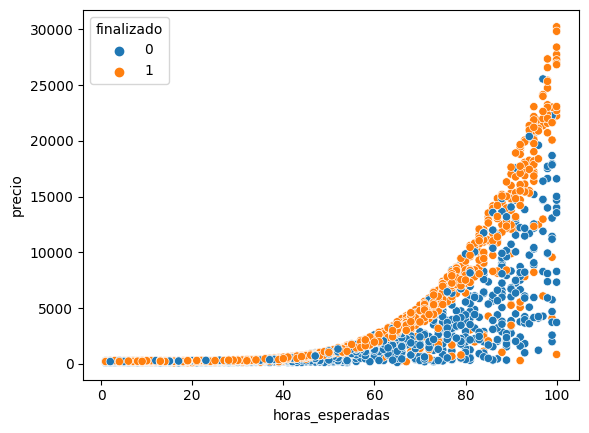

In [ ]:
import seaborn as sns

sns.scatterplot(x = 'horas_esperadas', y = 'precio', hue = 'finalizado' , data = datos);

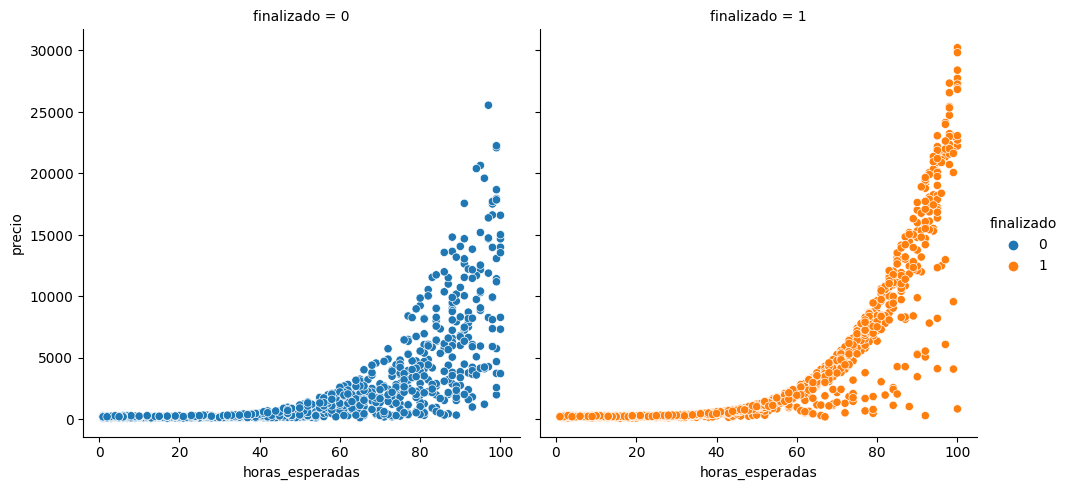

In [ ]:
sns.relplot(x = 'horas_esperadas', y = 'precio', hue = 'finalizado',col = 'finalizado' ,data = datos);

In [ ]:
import numpy as np

x = datos[['horas_esperadas','precio']]
y = datos.finalizado

SEED = 42
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, stratify = y)
print(f"Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos")

model = LinearSVC()
model.fit(x_train,y_train)
previsiones = model.predict(x_test)

tasa_de_aciertos = accuracy_score(y_test, previsiones)
print(f'La tasa de acuerto fue de {round(tasa_de_aciertos*100,2)}%')

Entrenaremos con 1617 elementos y probaremos con 540 elementos
La tasa de acuerto fue de 57.59%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
base_previsiones = np.ones(540)
tasa_de_aciertos = accuracy_score(y_test, base_previsiones)
print(f'La tasa de acuerto fue de {round(tasa_de_aciertos*100,2)}%')

La tasa de acuerto fue de 52.59%


<Axes: xlabel='horas_esperadas', ylabel='precio'>

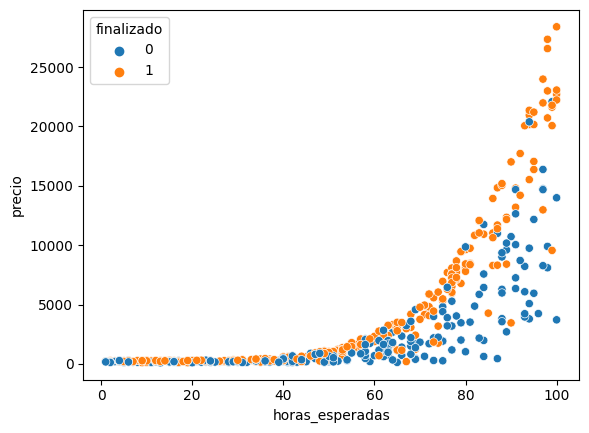

In [ ]:
sns.scatterplot(x = 'horas_esperadas', y = 'precio', hue = y_test, data = x_test)

In [ ]:
x_min = x_test.horas_esperadas.min()
x_max = x_test.horas_esperadas.max()
y_min = x_test.precio.min()
y_max = x_test.precio.max()

In [ ]:
pixels = 100
eje_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eje_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

In [ ]:
xx, yy = np.meshgrid(eje_x, eje_y)
puntos = np.c_[xx.ravel(), yy.ravel()]
puntos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.811502e+04],
       [9.802000e+01, 2.811502e+04],
       [9.901000e+01, 2.811502e+04]])

In [ ]:
z = model.predict(puntos)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [ ]:
z = z.reshape(xx.shape)
z

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

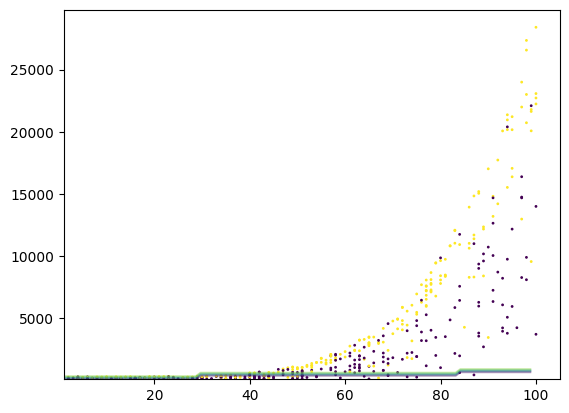

In [ ]:
import matplotlib.pyplot as plt

plt.contour(xx, yy, z, alpha=0.3)
plt.scatter(x_test.horas_esperadas, x_test.precio, c = y_test, s = 1);

Support Vector Machine

Entrenaremos con 1617 elementos y probaremos con 540 elementos
La tasa de acuerto fue de 67.78%


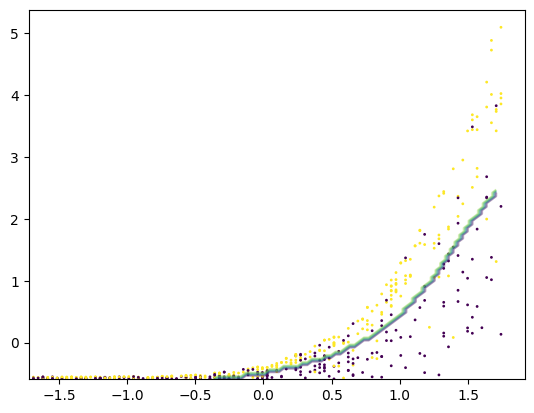

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

x = datos[['horas_esperadas','precio']]
y = datos.finalizado

SEED = 42
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, stratify = y)
print(f"Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos")

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = SVC()
model.fit(x_train,y_train)
previsiones = model.predict(x_test)

data_x = x_test[:,0]
data_y = x_test[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eje_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eje_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

xx, yy = np.meshgrid(eje_x, eje_y)
puntos = np.c_[xx.ravel(), yy.ravel()]
z = model.predict(puntos)
z = z.reshape(xx.shape)

plt.contour(xx, yy, z, alpha=0.3)
plt.scatter(data_x, data_y, c = y_test, s = 1);

tasa_de_aciertos = accuracy_score(y_test, previsiones)
print(f'La tasa de acuerto fue de {round(tasa_de_aciertos*100,2)}%')

### Dummy classifiers y árboles de decisión.

In [ ]:
uri = 'https://gist.githubusercontent.com/ahcamachod/1595316a6b37bf39baac355b081d9c3b/raw/98bc94de744764cef0e67922ddfac2a226ad6a6f/car_prices.csv'

datos = pd.read_csv(uri)
datos.head()

Unnamed: 0  mileage_per_year  model_year      price sold
0           0             21801        2000   30941.02  yes
1           1              7843        1998   40557.96  yes
2           2              7109        2006   89627.50   no
3           3             26823        2015   95276.14   no
4           4              7935        2014  117384.68  yes

In [ ]:
mapa = {
        'mileage_per_year':'millas_por_año',
        'model_year':'ano_del_modelo',
        'price':'precio',
        'sold':'vendido'
        }
datos = datos.rename(columns = mapa)
datos.sample(3)

Unnamed: 0  millas_por_año  ano_del_modelo    precio vendido
4062        4062           12914            2001  91492.55      no
338          338           13175            2002  77450.66      no
7900        7900            9524            2004  70029.90      no

In [ ]:
cambio = {
          'no':0,
          'yes':1
          }
datos.vendido = datos.vendido.map(cambio)
datos.sample(3)

Unnamed: 0  millas_por_año  ano_del_modelo    precio  vendido
7825        7825           11850            2006  54526.09        0
1339        1339            7848            2003  66631.71        1
1685        1685           21406            2007  44578.12        1

In [ ]:
from datetime import datetime

ano_actual = datetime.today().year
datos['edad_del_modelo'] = ano_actual - datos['ano_del_modelo']
datos.sample(3)

Unnamed: 0  millas_por_año  ano_del_modelo    precio  vendido  \
8290        8290           14255            2005  51606.00        1   
8686        8686           21236            2006  37042.17        1   
5642        5642            9998            2011  47241.59        1   

      edad_del_modelo  
8290               19  
8686               18  
5642               13

In [ ]:
#convertir de milla a kilometro
datos['km_por_ano'] = datos.millas_por_año * 1.60934
datos.sample(3)

Unnamed: 0  millas_por_año  ano_del_modelo    precio  vendido  \
100          100           17000            2002  45343.51        1   
5228        5228           15933            2000  61608.05        0   
3569        3569           13512            2000  39647.42        1   

      edad_del_modelo   km_por_ano  
100                22  27358.78000  
5228               24  25641.61422  
3569               24  21745.40208

In [ ]:
datos = datos.drop(columns = ['Unnamed: 0', 'millas_por_año', 'ano_del_modelo'], axis = 1)
datos.sample(3)

precio  vendido  edad_del_modelo   km_por_ano
689   47870.87        1               17  43307.33940
4978  35042.75        1               11  25730.12792
3483  39458.06        1               13  20506.21028

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

x = datos[['edad_del_modelo', 'km_por_ano','precio']]
y = datos.vendido

SEED = 42
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, stratify = y)
print(f"Entrenaremos con {len(raw_x_train)} elementos y probaremos con {len(raw_x_test)} elementos")

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = SVC()
model.fit(x_train,y_train)
previsiones = model.predict(x_test)

tasa_de_aciertos = accuracy_score(y_test, previsiones)
print(f'La tasa de acuerto fue de {round(tasa_de_aciertos*100,2)}%')

Entrenaremos con 7500 elementos y probaremos con 2500 elementos
La tasa de acuerto fue de 76.04%


In [ ]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy= 'stratified')
dummy.fit(x_train,y_train)
exactitud = dummy.score(x_test,y_test)*100
print(f'La exactitud del clasificador Dummy stratified fue: {round(exactitud,2)}%')

La exactitud del clasificador Dummy stratified fue: 52.64%


In [ ]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy= 'most_frequent')
dummy.fit(x_train,y_train)
exactitud = dummy.score(x_test,y_test)*100
print(f'La exactitud del clasificador Dummy most_frequent fue: {round(exactitud,2)}%')

La exactitud del clasificador Dummy most_frequent fue: 58.0%


In [ ]:
from sklearn.tree import DecisionTreeClassifier

x = datos[['edad_del_modelo', 'km_por_ano','precio']]
y = datos.vendido

SEED = 42
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, stratify = y)
print(f"Entrenaremos con {len(raw_x_train)} elementos y probaremos con {len(raw_x_test)} elementos")

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = DecisionTreeClassifier()
model.fit(x_train,y_train)
previsiones = model.predict(x_test)

tasa_de_aciertos = accuracy_score(y_test, previsiones)
print(f'La tasa de acuerto fue de {round(tasa_de_aciertos*100,2)}%')

Entrenaremos con 7500 elementos y probaremos con 2500 elementos
La tasa de acuerto fue de 71.8%


In [ ]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, feature_names= features)
grafico = graphviz.Source(dot_data)

In [ ]:
grafico

In [ ]:
#Empleando StandardScaler()
from sklearn.tree import DecisionTreeClassifier

x = datos[['edad_del_modelo', 'km_por_ano','precio']]
y = datos.vendido

SEED = 42
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, stratify = y)
print(f"Entrenaremos con {len(raw_x_train)} elementos y probaremos con {len(raw_x_test)} elementos")

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train,y_train)
previsiones = model.predict(x_test)

tasa_de_aciertos = accuracy_score(y_test, previsiones)
print(f'La tasa de acuerto fue de {round(tasa_de_aciertos*100,2)}%')

Entrenaremos con 7500 elementos y probaremos con 2500 elementos
La tasa de acuerto fue de 78.04%


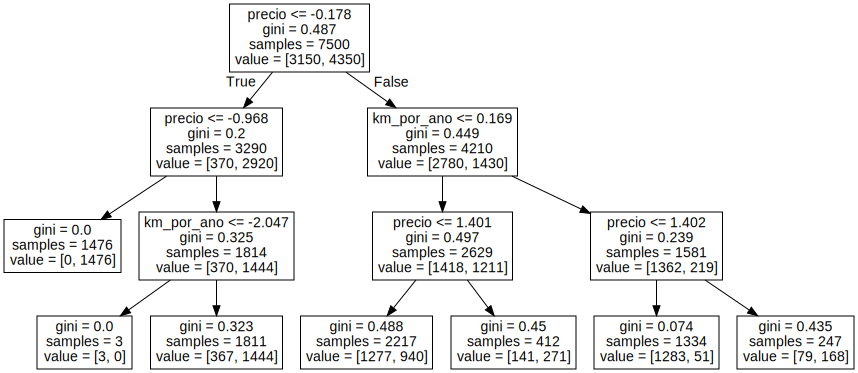

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, feature_names= features)
grafico = graphviz.Source(dot_data)
grafico

In [ ]:
#Sin estandarizar
from sklearn.tree import DecisionTreeClassifier

x = datos[['edad_del_modelo', 'km_por_ano','precio']]
y = datos.vendido

SEED = 42
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, stratify = y)
print(f"Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos")


model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train,y_train)
previsiones = model.predict(x_test)

tasa_de_aciertos = accuracy_score(y_test, previsiones)
print(f'La tasa de acuerto fue de {round(tasa_de_aciertos*100,2)}%')

Entrenaremos con 7500 elementos y probaremos con 2500 elementos
La tasa de acuerto fue de 78.04%


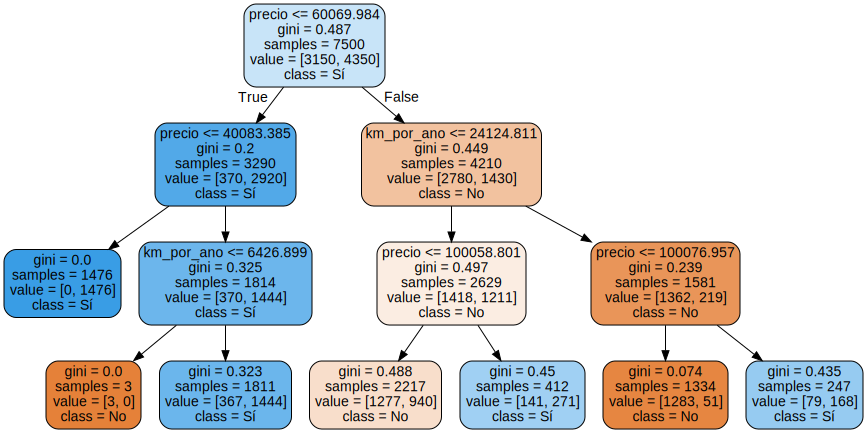

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, feature_names= features, filled = True, rounded = True, class_names = ['No', 'Sí'])
grafico = graphviz.Source(dot_data)
grafico

In [ ]:
#situacion con los datos ordenados de la peor manera
datos_ord = datos.sort_values("vendido", ascending = True)
x_ord = datos_ord[["precio", "edad_del_modelo", "km_por_ano"]]
y_ord = datos_ord["vendido"]
datos_ord.head()

precio  vendido  edad_del_modelo   km_por_ano
4999  74023.29        0               18  24812.80412
5322  84843.49        0               19  23095.63834
5319  83100.27        0               25  36240.72746
5316  87932.13        0               22  32249.56426
5315  77937.01        0               21  28414.50704

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier(strategy='stratified')
results = cross_validate(modelo, x_ord, y_ord, cv = 10, return_train_score=False)
media = results["test_score"].mean()
desviacion_estandar = results["test_score"].std()
print("Accuracy con dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desviacion_estandar) * 100, (media + 2 * desviacion_estandar) * 100))

Accuracy con dummy stratified, 10 = [49.79, 53.45]


In [ ]:
#cambiando de modelo
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_ord, y_ord, cv = 10, return_train_score=False)
media = results["test_score"].mean()
desviacion_estandar = results["test_score"].std()
print("Accuracy con dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desviacion_estandar) * 100, (media + 2 * desviacion_estandar) * 100))

Accuracy con dummy stratified, 10 = [73.83, 77.73]


In [ ]:
#generando datos aleatorios del modelo de carro
np.random.seed(SEED)
datos["modelo"] = datos.edad_del_modelo + np.random.randint(-2, 3, size=10000)
datos.modelo = datos.modelo + abs(datos.modelo.min()) + 1
datos.head()

precio  vendido  edad_del_modelo   km_por_ano  modelo
0   30941.02        1               24  35085.22134      28
1   40557.96        1               26  12622.05362      34
2   89627.50        0               18  11440.79806      24
3   95276.14        0                9  43167.32682      16
4  117384.68        1               10  12770.11290      15

In [ ]:
def imprime_resultados(results):
  media = results["test_score"].mean() * 100
  desviacion = results["test_score"].std() * 100
  print("Accuracy media %.2f"% media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desviacion, media + 2 * desviacion))

In [ ]:
#GroupKFold para analizar como el modelo se comporta con nuevos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits=10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 75.78
Intervalo [73.67, 77.90]


In [ ]:
#GroupKFold en un pipeline con StandardScaler y SVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacion',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits=10)
results = cross_validate(pipeline, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 76.68
Intervalo [74.28, 79.08]


In [ ]:
# GroupKFold para analizar como el modelo se comporta con nuevos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 75.78
Intervalo [73.67, 77.90]


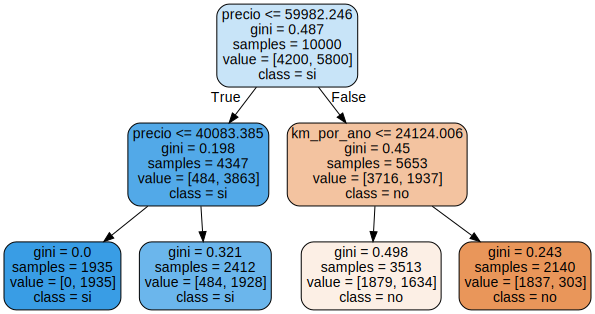

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_ord, y_ord)
features = x_ord.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True,
                           rounded=True,class_names=['no','si'],
                           feature_names = features)

graph = graphviz.Source(dot_data)
graph

In [ ]:
# GroupKFold para analizar como el modelo se comporta con nuevos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 78.67
Intervalo [76.40, 80.94]


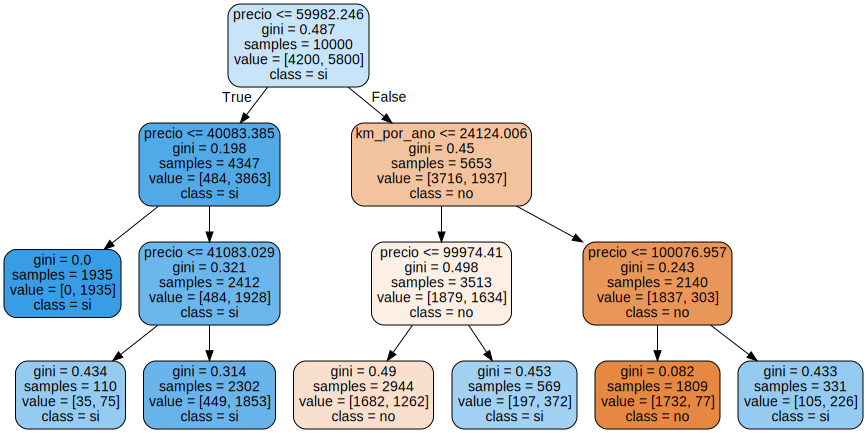

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_ord, y_ord)
features = x_ord.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True,
                           rounded=True,class_names=['no','si'],
                           feature_names = features)

graph = graphviz.Source(dot_data)
graph

In [ ]:
# GroupKFold para analizar como el modelo se comporta con nuevos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=10)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 77.19
Intervalo [75.26, 79.13]


##Explorando hiper-parámetros en una dimensión

In [ ]:
def iniciar_arbol_de_decision(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=True)
  test_score = results['test_score'].mean()*100
  train_score = results['train_score'].mean()*100
  print("Arbol max_depth = %d, training = %.2f, testing = %.2f" % (max_depth, train_score, test_score))
  tabla = [max_depth, train_score, test_score]
  return tabla

resultados = [iniciar_arbol_de_decision(i) for i in range(1,33)]
resultados = pd.DataFrame(resultados, columns=['max_depth', 'train', 'test'])
resultados.head()

Arbol max_depth = 1, training = 75.79, testing = 75.78
Arbol max_depth = 2, training = 75.79, testing = 75.78
Arbol max_depth = 3, training = 78.75, testing = 78.67
Arbol max_depth = 4, training = 78.79, testing = 78.63
Arbol max_depth = 5, training = 78.94, testing = 78.56
Arbol max_depth = 6, training = 79.17, testing = 78.12
Arbol max_depth = 7, training = 79.50, testing = 77.96
Arbol max_depth = 8, training = 79.89, testing = 77.86
Arbol max_depth = 9, training = 80.46, testing = 77.38
Arbol max_depth = 10, training = 81.16, testing = 77.19
Arbol max_depth = 11, training = 82.03, testing = 76.97
Arbol max_depth = 12, training = 82.89, testing = 76.49
Arbol max_depth = 13, training = 83.95, testing = 75.81
Arbol max_depth = 14, training = 85.03, testing = 75.66
Arbol max_depth = 15, training = 86.14, testing = 75.16
Arbol max_depth = 16, training = 87.19, testing = 75.11
Arbol max_depth = 17, training = 88.31, testing = 74.74
Arbol max_depth = 18, training = 89.26, testing = 74.33
A

max_depth      train       test
0          1  75.791169  75.784219
1          2  75.791169  75.784219
2          3  78.750993  78.672633
3          4  78.787628  78.632803
4          5  78.941007  78.555912

###Overfit

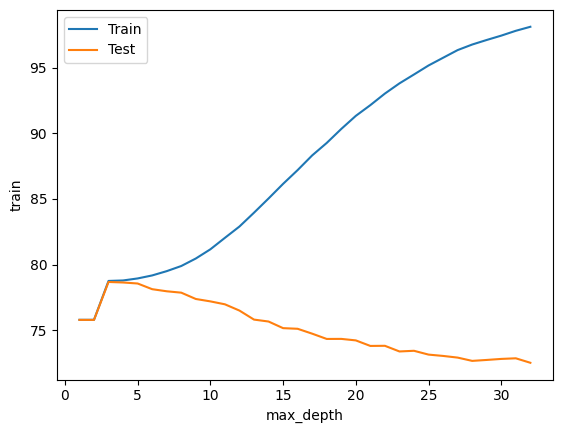

In [ ]:
import seaborn as sns

sns.lineplot(x='max_depth', y='train', data=resultados, label='Train');
sns.lineplot(x='max_depth', y='test', data=resultados, label='Test');

Podemos observar un overfitting en esta gráfica, pues recibe tanto entrenamiento que al ir al mundo real no sive

In [ ]:
resultados.sort_values('test', ascending=False).head()

max_depth      train       test
2          3  78.750993  78.672633
3          4  78.787628  78.632803
4          5  78.941007  78.555912
5          6  79.170115  78.123266
6          7  79.496806  77.963185

##Explorando hiper-parámetros en dos dimensiones

In [ ]:
def iniciar_arbol_de_decision(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=True)
  test_score = results['test_score'].mean()*100
  train_score = results['train_score'].mean()*100
  print("Arbol max_depth = %d, min_samples_leaf = %.2f, training = %.2f, testing = %.2f" % (max_depth, min_samples_leaf,train_score, test_score))
  tabla = [max_depth, min_samples_leaf, train_score, test_score]
  return tabla

def buscar():
  resultados = []
  for max_depth in range(1,32):
    for min_samples_leaf in [32, 64, 128, 256]:
      tabla = iniciar_arbol_de_decision(max_depth,min_samples_leaf)
      resultados.append(tabla)
  resultados = pd.DataFrame(resultados, columns=['max_depth', 'min_samples_leaf', 'train', 'test'])
  return resultados

resultados = buscar()
resultados.head()


Arbol max_depth = 1, min_samples_leaf = 32.00, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64.00, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 128.00, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 256.00, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 32.00, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 64.00, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 128.00, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 256.00, training = 75.79, testing = 75.78
Arbol max_depth = 3, min_samples_leaf = 32.00, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 64.00, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 128.00, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 256.00, training = 78.75, testing = 78.67
Arbol max_depth = 4, m

max_depth  min_samples_leaf      train       test
0          1                32  75.791169  75.784219
1          1                64  75.791169  75.784219
2          1               128  75.791169  75.784219
3          1               256  75.791169  75.784219
4          2                32  75.791169  75.784219

In [ ]:
resultados.sort_values('test', ascending=False).head()

max_depth  min_samples_leaf      train       test
11          3               256  78.750993  78.672633
8           3                32  78.750993  78.672633
15          4               256  78.750993  78.672633
14          4               128  78.750993  78.672633
13          4                64  78.750993  78.672633

In [ ]:
corr = resultados.corr()
corr

max_depth  min_samples_leaf     train      test
max_depth         1.000000e+00     -2.819789e-16  0.546146 -0.024381
min_samples_leaf -2.819789e-16      1.000000e+00 -0.401773  0.341805
train             5.461464e-01     -4.017734e-01  1.000000  0.133720
test             -2.438091e-02      3.418055e-01  0.133720  1.000000

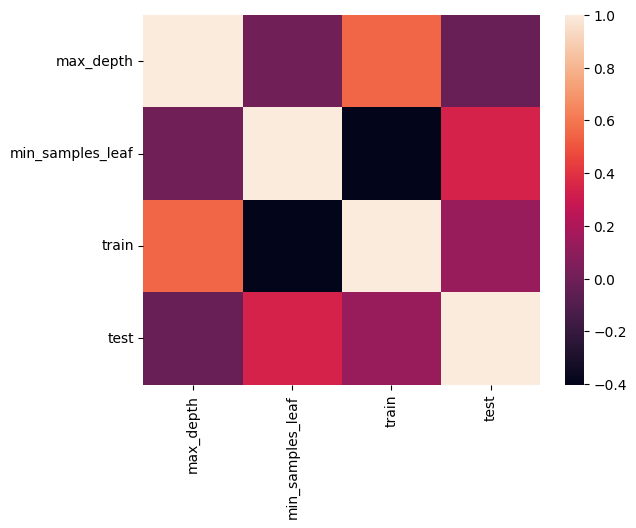

In [ ]:
sns.heatmap(corr);

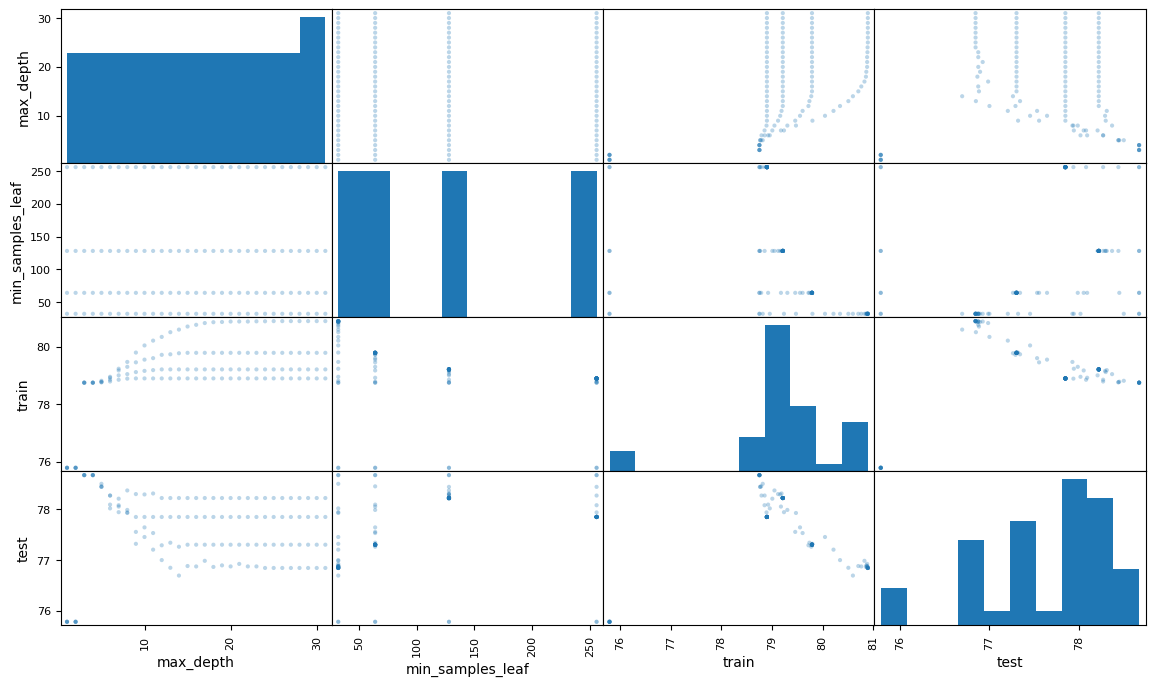

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(resultados, figsize = (14,8), alpha=0.3);

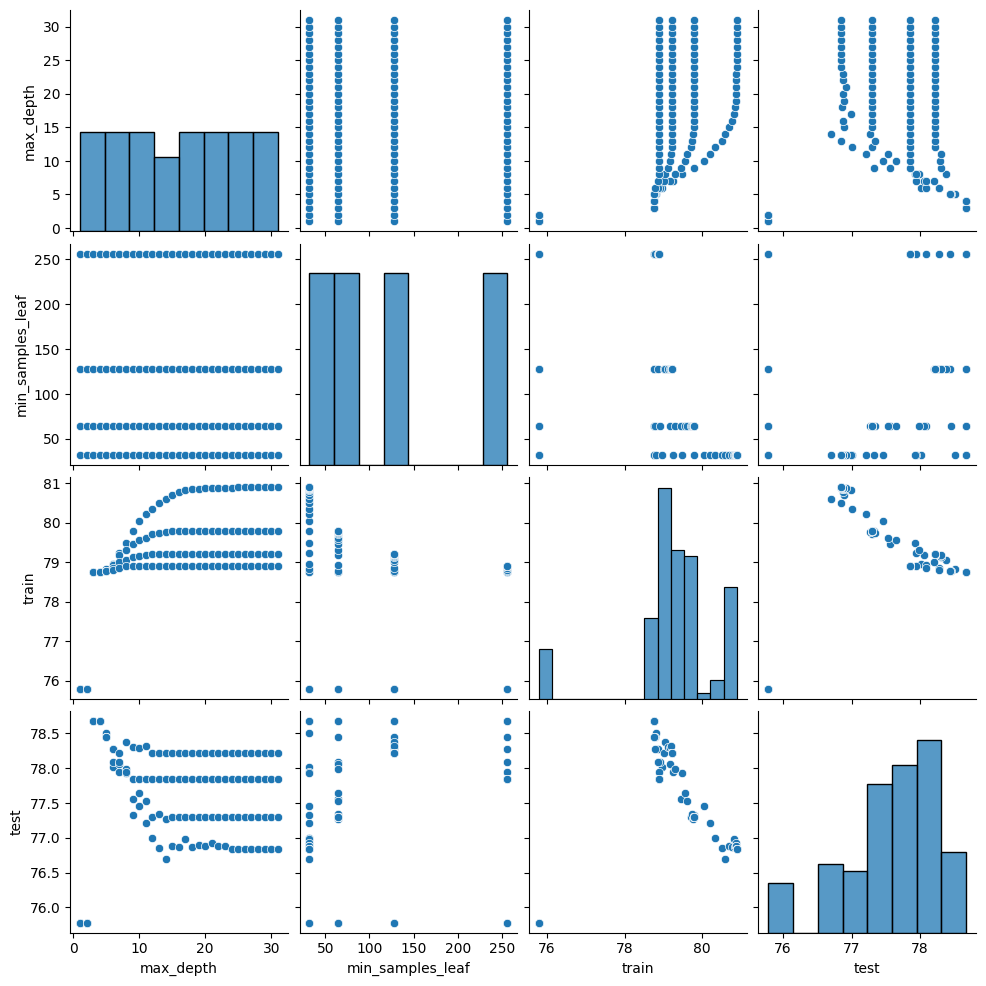

In [ ]:
sns.pairplot(resultados);

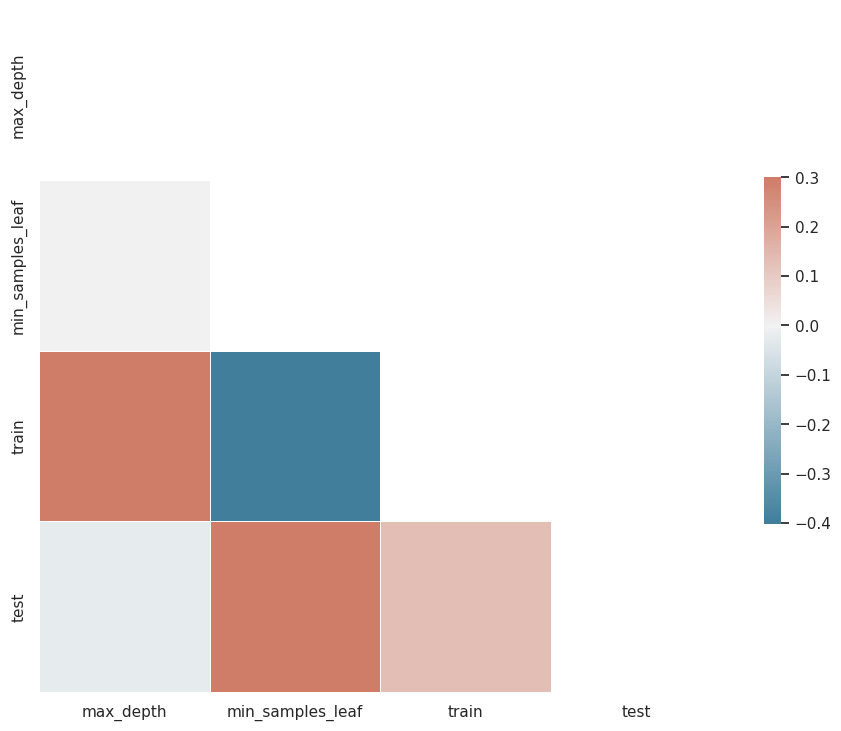

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [ ]:
def buscar():
  resultados = []
  for max_depth in range(1,10):
    for min_samples_leaf in [128, 190, 220,256]:
      tabla = iniciar_arbol_de_decision(max_depth,min_samples_leaf)
      resultados.append(tabla)
  resultados = pd.DataFrame(resultados, columns=['max_depth', 'min_samples_leaf', 'train', 'test'])
  return resultados

resultados = buscar()
resultados.head()

Arbol max_depth = 1, min_samples_leaf = 128.00, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 190.00, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 220.00, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 256.00, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 128.00, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 190.00, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 220.00, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 256.00, training = 75.79, testing = 75.78
Arbol max_depth = 3, min_samples_leaf = 128.00, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 190.00, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 220.00, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 256.00, training = 78.75, testing = 78.67
Arbol max_depth 

max_depth  min_samples_leaf      train       test
0          1               128  75.791169  75.784219
1          1               190  75.791169  75.784219
2          1               220  75.791169  75.784219
3          1               256  75.791169  75.784219
4          2               128  75.791169  75.784219

In [ ]:
resultados.sort_values('test', ascending=False).head()

max_depth  min_samples_leaf      train       test
13          4               190  78.750993  78.672633
11          3               256  78.750993  78.672633
15          4               256  78.750993  78.672633
14          4               220  78.750993  78.672633
12          4               128  78.750993  78.672633

##Explorando 3 dimensiones de hiper parámetros

In [ ]:
def iniciar_arbol_de_decision(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=True)
  test_score = results['test_score'].mean()*100
  train_score = results['train_score'].mean()*100
  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()
  print("Arbol max_depth = %d, min_samples_leaf = %.2f,  min_samples_split = %.2f, training = %.2f, testing = %.2f" % (max_depth, min_samples_leaf,  min_samples_split, train_score, test_score))
  tabla = [max_depth, min_samples_leaf,  min_samples_split, train_score, test_score, fit_time, score_time]
  return tabla

def buscar():
  resultados = []
  for max_depth in range(1,32):
    for min_samples_leaf in [32, 64, 128, 256]:
      for  min_samples_split in [32, 64, 128, 256]:
        tabla = iniciar_arbol_de_decision(max_depth, min_samples_leaf, min_samples_split)
        resultados.append(tabla)
  resultados = pd.DataFrame(resultados, columns=['max_depth', 'min_samples_leaf', ' min_samples_split','train', 'test', 'fit_time', 'score_time'])
  return resultados

resultados = buscar()
resultados.head()


Arbol max_depth = 1, min_samples_leaf = 32.00,  min_samples_split = 32.00, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 32.00,  min_samples_split = 64.00, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 32.00,  min_samples_split = 128.00, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 32.00,  min_samples_split = 256.00, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64.00,  min_samples_split = 32.00, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64.00,  min_samples_split = 64.00, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64.00,  min_samples_split = 128.00, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64.00,  min_samples_split = 256.00, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 128.00,  min_samples_split = 32.00, training = 75.79, testing = 75.78
Arbol max_dept

max_depth  min_samples_leaf   min_samples_split      train       test  \
0          1                32                  32  75.791169  75.784219   
1          1                32                  64  75.791169  75.784219   
2          1                32                 128  75.791169  75.784219   
3          1                32                 256  75.791169  75.784219   
4          1                64                  32  75.791169  75.784219   

   fit_time  score_time  
0  0.006220    0.001899  
1  0.006037    0.002125  
2  0.006542    0.002345  
3  0.005973    0.002022  
4  0.006343    0.002048

In [ ]:
corr = resultados.corr()

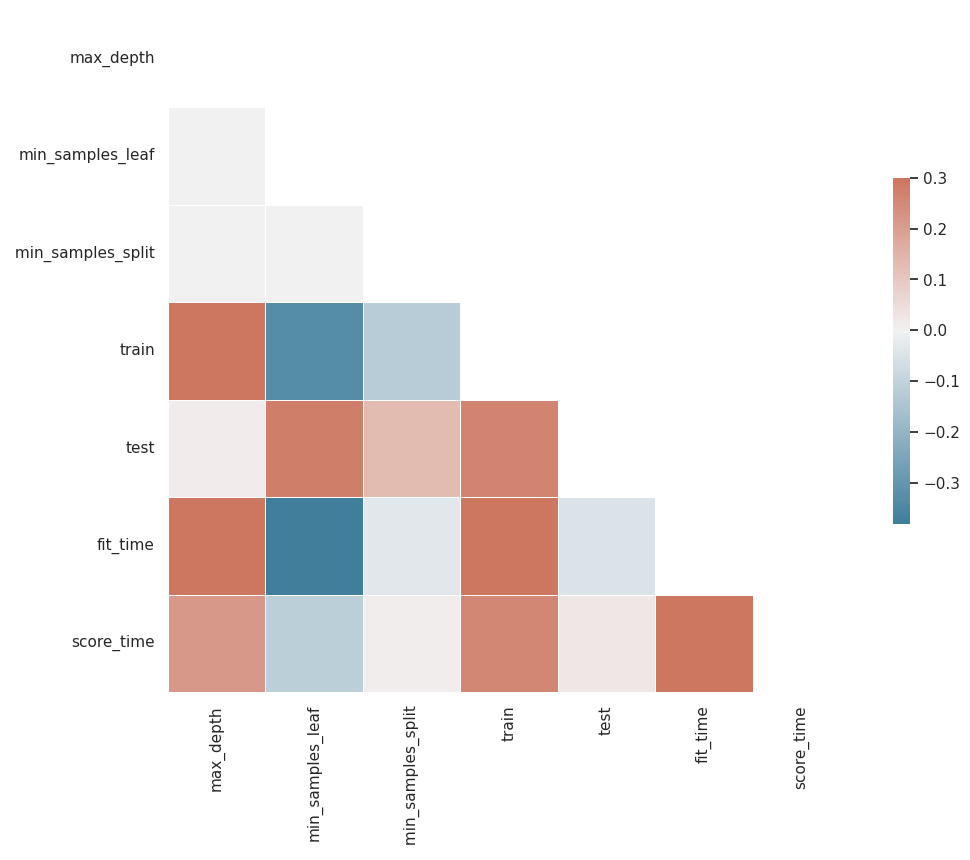

In [ ]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [ ]:
resultados.sort_values('test', ascending=False).head()

max_depth  min_samples_leaf   min_samples_split      train       test  \
45          3               256                  64  78.750993  78.672633   
41          3               128                  64  78.750993  78.672633   
48          4                32                  32  78.750993  78.672633   
47          3               256                 256  78.750993  78.672633   
46          3               256                 128  78.750993  78.672633   

    fit_time  score_time  
45  0.015626    0.003685  
41  0.016032    0.003116  
48  0.016685    0.003094  
47  0.015342    0.003260  
46  0.016180    0.003519

##Explorando espacios con de hiper parámetros con GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)

espacio_de_parametros = {
    'max_depth': [3,5],
    'min_samples_split': [32,64,128],
    'min_samples_leaf': [32,64,128],
    'criterion': ['gini', 'entropy']
}

buscar = GridSearchCV(DecisionTreeClassifier(),
                      espacio_de_parametros,
                      cv = GroupKFold(n_splits = 10))
buscar.fit(x_ord, y_ord, groups = datos.modelo)
resultados = pd.DataFrame(buscar.cv_results_)
resultados.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.012174      0.002610         0.002105        0.000185   
1       0.011362      0.001021         0.002064        0.000126   
2       0.011286      0.000480         0.002209        0.000270   
3       0.011437      0.000678         0.002345        0.000334   
4       0.011267      0.001203         0.002137        0.000466   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               3                     32   
1            gini               3                     32   
2            gini               3                     32   
3            gini               3                     64   
4            gini               3                     64   

  param_min_samples_split                                             params  \
0                      32  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   
1                      64  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   
2                     128  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   
3                      32  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   
4                      64  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   

   split0_test_score  ...  split3_test_score  split4_test_score  \
0           0.804757  ...            0.78408           0.783181   
1           0.804757  ...            0.78408           0.783181   
2           0.804757  ...            0.78408           0.783181   
3           0.804757  ...            0.78408           0.783181   
4           0.804757  ...            0.78408           0.783181   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0           0.797809           0.762866           0.781818            0.77551   
1           0.797809           0.762866           0.781818            0.77551   
2           0.797809           0.762866           0.781818            0.77551   
3           0.797809           0.762866           0.781818            0.77551   
4           0.797809           0.762866           0.781818            0.77551   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.790262         0.786726        0.011361                1  
1           0.790262         0.786726        0.011361                1  
2           0.790262         0.786726        0.011361                1  
3           0.790262         0.786726        0.011361                1  
4           0.790262         0.786726        0.011361                1  

[5 rows x 22 columns]

In [ ]:
print(buscar.best_params_)
print(buscar.best_score_*100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.67263337284332


In [ ]:
mejor = buscar.best_estimator_
mejor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [ ]:
from sklearn.metrics import accuracy_score

prediccion = mejor.predict(x_ord)
accuracy = accuracy_score(prediccion, y_ord) * 100
print('Accuracy para los datos fue %.2f%%' % (accuracy))

Accuracy para los datos fue 78.75%


##Nested Cross Validation

In [ ]:
#Para el escenario real
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

espacio_de_parametros = {
    'max_depth': [3,5],
    'min_samples_split': [32,64,128],
    'min_samples_leaf': [32,64,128],
    'criterion': ['gini', 'entropy']
}

buscar = GridSearchCV(DecisionTreeClassifier(),
                      espacio_de_parametros,
                      cv = KFold(n_splits = 5, shuffle = True))
buscar.fit(x_ord, y_ord)
resultados = pd.DataFrame(buscar.cv_results_)
resultados.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.015868      0.001627         0.003826        0.000222   
1       0.015136      0.001339         0.003740        0.000153   
2       0.016448      0.003862         0.004221        0.001147   
3       0.014751      0.001015         0.004370        0.001593   
4       0.015089      0.000953         0.003873        0.000444   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               3                     32   
1            gini               3                     32   
2            gini               3                     32   
3            gini               3                     64   
4            gini               3                     64   

  param_min_samples_split                                             params  \
0                      32  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   
1                      64  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   
2                     128  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   
3                      32  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   
4                      64  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0              0.784              0.776             0.8025              0.793   
1              0.784              0.776             0.8025              0.793   
2              0.784              0.776             0.8025              0.793   
3              0.784              0.776             0.8025              0.793   
4              0.784              0.776             0.8025              0.793   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0             0.7795            0.787        0.009618                1  
1             0.7795            0.787        0.009618                1  
2             0.7795            0.787        0.009618                1  
3             0.7795            0.787        0.009618                1  
4             0.7795            0.787        0.009618                1

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(buscar, x_ord, y_ord, cv = KFold(n_splits=5, shuffle=True))
scores

array([0.7895, 0.7825, 0.7905, 0.7715, 0.7995])

In [ ]:
def imprime_score(scores):
  media = scores.mean() * 100
  desviacion = scores.std() * 100
  print("Accuracy media %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desviacion, media + 2 * desviacion))

In [ ]:
imprime_score(scores)

Accuracy media 78.67
Intervalo [76.80, 80.54]


In [ ]:
mejor = buscar.best_estimator_
mejor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

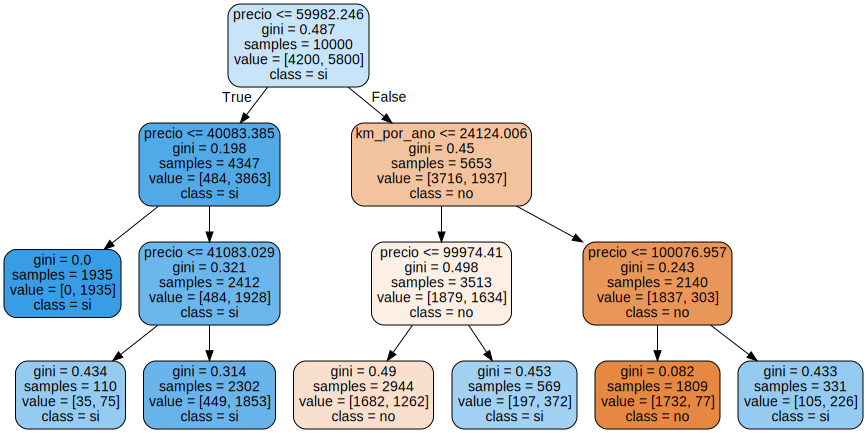

In [ ]:
features = x_ord.columns
dot_data = export_graphviz(mejor, out_file=None, filled=True, rounded=True,
                           class_names=['no','si'],
                           feature_names = features)
graph = graphviz.Source(dot_data)
graph